### < CSCN8010-24s-Sec1 >
### Foundations of Machine Learning

## Practice Lab3


<h3> Professor: Urvi Palvankar<br><br>
Name: AeKyung Yang<br><br>
ID: 8978373</h3>

## Univariate Linear Regression on the Scikit-Learn Diabetes Dataset

This lab should be submitted as a notebook, in the same manner as lab2. 

* `Scikit-Learn` provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)).
* In this practical lab we will explore a univariate linear regression using the diabetes dataset. Here is a [description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) of the dataset and its columns. **Make sure to go over this description, when you start exploring the data**.
* **The data can be loaded into a notebook by:**
```python
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
```
* Follow the relevant steps in the [Machine Learning Workflow](https://github.com/ageron/handson-ml3/blob/main/ml-project-checklist.md). Steps 1,2,3,6,7 are probably those that you would like to go over. Step 4 is probably not required, given the linear model being used. No need to explore the whole dataset. For data exploration, keep it short 1-3 graphs. The focus is the linear regression, and a presentation of its results.
* Run a univariate linear regression between `bmi body mass index` (independent variable) and `a quantitative measure of disease progression one year after baseline`(this is `diabetes_y` in the code below - and the dependent variable).
* Report your results: the model's parameters (slope and intercept), the loss on the train and test datasets, graphs of the training data, test data and the model. Provide your take-aways from the fit. Is it a good one? 


### Notes

1. While partitioning the data to train and test is required for reporting the results on unseen-data-during-training, a validation set is not required. That is, unless you intend to train various models, or test various hyperparameters. These is not an expectation, so most likely a validation set is not needed.


This checklist can guide you through your Machine Learning projects. There are eight main steps:

<p style="color:gray;font-size:120%;">1. Frame the problem and look at the big picture.</p>
<p style="color:blue;font-size:120%;">2. Get the data.</p>
<p style="color:blue;font-size:120%;">3. Explore the data to gain insights.</p>
<p style="color:gray;font-size:120%;">4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.</p>
<p style="color:blue;font-size:120%;">5. Explore many different models and short-list the best ones.</p>
<p style="color:blue;font-size:120%;">6. Fine-tune your models and combine them into a great solution.</p>
<p style="color:blue;font-size:120%;">7. Present your solution.</p>
<p style="color:gray;font-size:120%;">8. Launch, monitor, and maintain your system.</p>

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 2. Get the data
** Note: automate as much as possible so you can easily get fresh data.

* List the data you need and how much you need.
* Find and document where you can get that data.
* Check how much space it will take.
* Check legal obligations, and get the authorization if necessary.
* Get access authorizations.
* Create a workspace (with enough storage space).
* Get the data.
* Convert the data to a format you can easily manipulate (without changing the data itself).
* Ensure sensitive information is deleted or protected (e.g., anonymized).
* Check the size and type of data (time series, sample, geographical, etc.).
* Sample a test set, put it aside, and never look at it (no data snooping!).

## Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

### Data Set Characteristics:
<ul>
<li style='font-size:120%'>Number of Instances:  442</li>
<li style='font-size:120%'>Number of Attributes:  First 10 columns are numeric predictive values</li>
<li style='font-size:120%'>Target (integer, 25~346):  Column 11 is a quantitative measure of disease progression one year after baseline</li>
    <li style='font-size:120%'>Attribute Information (real,$ -2<x<2 $):</li>
    <li style='font-size:120%'>
        <ol><li>age age in years</li>
            <li>sex</li>
            <li>bmi body mass index</li>
            <li>bp average blood pressure</li>
            <li>s1 tc, total serum cholesterol</li>
            <li>s2 ldl, low-density lipoproteins</li>
            <li>s3 hdl, high-density lipoproteins</li>
            <li>s4 tch, total cholesterol / HDL</li>
            <li>s5 ltg, possibly log of serum triglycerides level</li>
            <li>s6 glu, blood sugar level</li>
        </ol></li>
</ul>

<br>
** Note:
* Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1) [Source URL](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

* For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

* `Scikit-Learn` provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)).
* In this practical lab we will explore a univariate linear regression using the diabetes dataset. Here is a [description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) of the dataset and its columns.

In [159]:
# Diabeit dataset loading
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [160]:
# check data loading
diabetes_X[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

## 3. Explore the data
** Note: try to get insights from a field expert for these steps.
<ol>
<li> Create a copy of the data for exploration (sampling it down to a manageable size if necessary).</li>
<li> Create a Jupyter notebook to keep record of your data exploration.</li>
<li> Study each attribute and its characteristics:
    <ul>
<li> Name</li>
<li>Type (categorical, int/float, bounded/unbounded, text, structured, etc.)</li>
<li>% of missing values</li>
<li>Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)</li>
<li>Possibly useful for the task?</li>
<li>Type of distribution (Gaussian, uniform, logarithmic, etc.)</li>
    </ul>
    </li>
<li>For supervised learning tasks, identify the target attribute(s).</li>
<li>Visualize the data.</li>
<li>Study the correlations between attributes.</li>
<li>Study how you would solve the problem manually.</li>
<li>Identify the promising transformations you may want to apply.</li>
<li>Identify extra data that would be useful (go back to "Get the Data" on page 502).</li>
<li>Document what you have learned.
</ol>

In [201]:
# column name from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
column_name = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Label']

# np array to Pandas DataFrame
diabetes_train_X = pd.DataFrame(diabetes_X, columns=column_name[:-1])  # learning data
diabetes_train_y = pd.DataFrame(diabetes_y) # label data
diabetes_train_data = pd.concat([train_x, train_y], axis=1) # total data with label

In [202]:
diabetes_train_data.columns = column_name
diabetes_train_data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [203]:
# check noise (unrelated) data
diabetes_train_data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Label
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [204]:
# check data shape and size

print(f'Data Shape: {diabetes_train_data.shape}, Data Size: {diabetes_train_data.size}')

Data Shape: (442, 11), Data Size: 4862


In [205]:
# check NULL value
pd.isnull(diabetes_train_data).sum()

AGE      0
SEX      0
BMI      0
BP       0
S1       0
S2       0
S3       0
S4       0
S5       0
S6       0
Label    0
dtype: int64

In [206]:
diabetes_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    float64
 1   SEX     442 non-null    float64
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    float64
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    float64
 10  Label   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### 3.5. Visualize the data

#### 3.5.1 Scatter Plot between BMI and Qualtitative measure of disease progress 1-year after baseline 

Text(0.5, 1.0, 'BMI and Quantitative measure of disease progression one year after baseline')

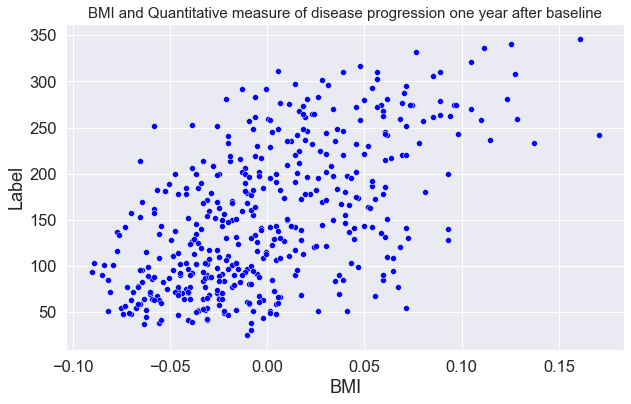

In [266]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train_data, color="blue")
plt.title("BMI and Quantitative measure of disease progression one year after baseline", fontsize=15)

#### 3.5.2. Joint Plot between BMI and Y-value

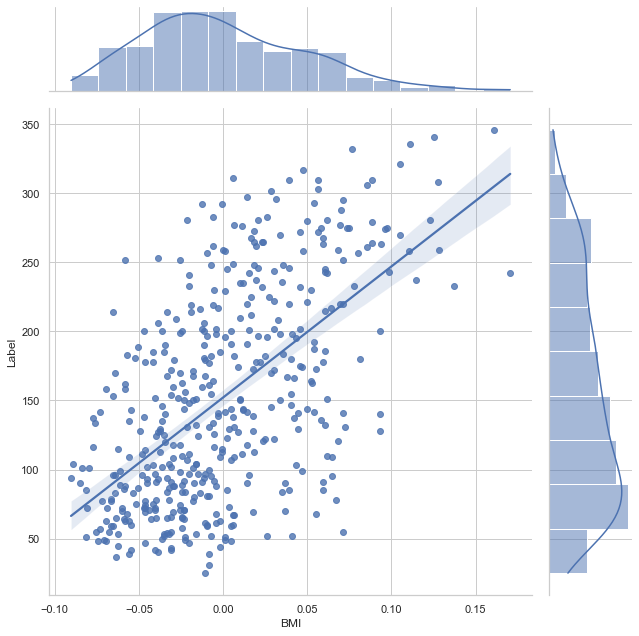

In [261]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="BMI", y="Label", data=train_data, kind='reg',height=9)

# Data Preprocessing

# Train and Test Split

Split the data into training/testing sets. 
Use the first 70% of the data for training.

In [485]:
train_size = int(len(diabetes_train_data) * 0.7)
train = diabetes_train_data[:train_size]
test = diabetes_train_data[train_size:]

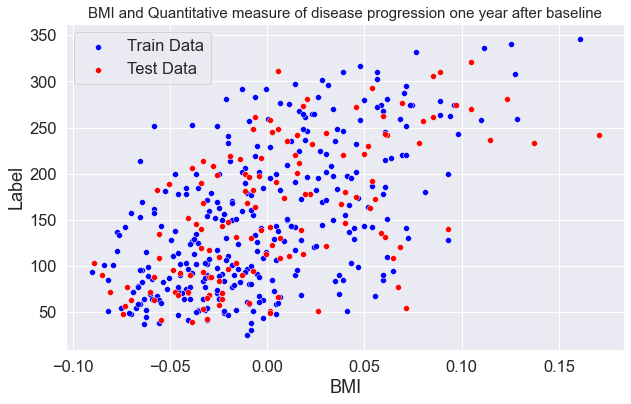

In [486]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train, color="blue",label='Train Data')
sns.scatterplot(x="BMI", y="Label", data=test, color="red", label='Test Data')
plt.title("BMI and Quantitative measure of disease progression one year after baseline", fontsize=15)
plt.legend()

## 5. Short-list promising models
Notes:

* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
* Once again, try to automate these steps as much as possible.

(1) Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.\
(2) Measure and compare their performance.\
(3) For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance.\
(4) Analyze the most significant variables for each algorithm.\
(5) Analyze the types of errors the models make.\
(6) What data would a human have used to avoid these errors?\
(7) Have a quick round of feature selection and engineering.\
(8) Have one or two more quick iterations of the five previous steps.\
(9) Short-list the top three to five most promising models, preferring models that make different types of errors.

In [487]:
# Train Model

# train_X: training data
# train_y: label data
def modelFit(model, train_X, train_y):
    model.fit(X=train_X, y=train_y)

# get slope and intercept after fitting
def getSlopeIntercept(model):
    return model.coef_, model.intercept_

# predict
def modelPredict(model, value):
    return model.predict(value)


# Evaluate Model

# get mean squared error
def getMSE(model, label, predict_value):
    return mean_squared_error(label, predict_value)

# get mean absolute errlr
def getMAE(model, label, predict_value):
    return mean_absolute_error(label, predict_value)


# run from fitting to predict
def modelRun(model, train_X, train_y, test_X, test_y):
    modelFit(model, train_X, train_y)
    m,b=getSlopeIntercept(model)
    predict_y = modelPredict(model, test_X)
    mse = getMSE(model, test_y, predict_y)
    mae = getMAE(model, test_y, predict_y)
    return m,b, predict_y, mse, mae
 
    


# Define a Model

Create a linear regression object

In [488]:
model = linear_model.LinearRegression()

# Train the Model

In [489]:
# fit
modelFit(model,train[["BMI"]],train[["Label"]] )

# Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [491]:
# print coefficients
m,b = getSlopeIntercept(model)
print(f"Intercept: {b}")
print(f"Coefficients: {m}")

Intercept: [151.55092419]
Coefficients: [[976.10822731]]


In [310]:
12*model.coef_ + model.intercept_

array([[11864.84965187]])

In [492]:
predict_value = [[-0.5],[0],[0.5],[1.0],[2.0]]
modelPredict(model,predict_value)

c:\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-336.50318946],
       [ 151.55092419],
       [ 639.60503784],
       [1127.6591515 ],
       [2103.7673788 ]])

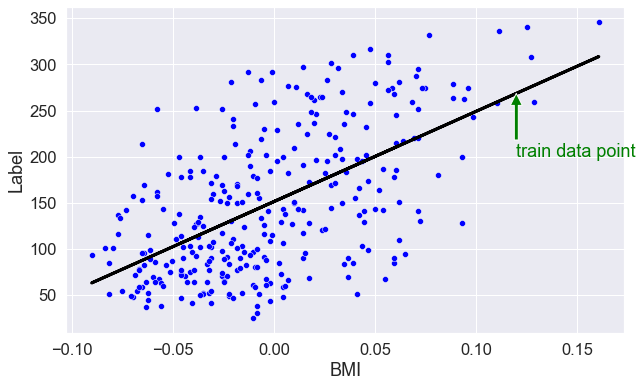

In [493]:
# plot the regression line against the training data
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train, color="blue")
plt.plot(train[["BMI"]], model.predict(train[["BMI"]]), color="black", linewidth=3)
plt.annotate('train data point', xy=(0.12, m*0.12+b), xytext=(0.12, m*0.05+ b), color='green', arrowprops=dict(facecolor='green'))
plt.show()

In [494]:
# print the MSE and MAE on the train set
print("Train set")

print(f"Mean squared error: {getMSE(model,train[['Label']], model.predict(train[['BMI']]))}")
print(f"Mean absolute error: {getMAE(model,train[['Label']], model.predict(train[['BMI']]))}")

Train set
Mean squared error: 3986.5557132475687
Mean absolute error: 52.19634802757251


In [496]:
# print the MSE and MAE on the test set
print("Test set")

print(f"Mean squared error: {getMSE(model,test[['Label']], model.predict(test[['BMI']]))}")
print(f"Mean absolute error: {getMAE(model,test[['Label']], model.predict(test[['BMI']]))}")

Test set
Mean squared error: 3673.6657653446073
Mean absolute error: 50.30760199485703


Text(0.12, [[200.35633556]], 'test data point')

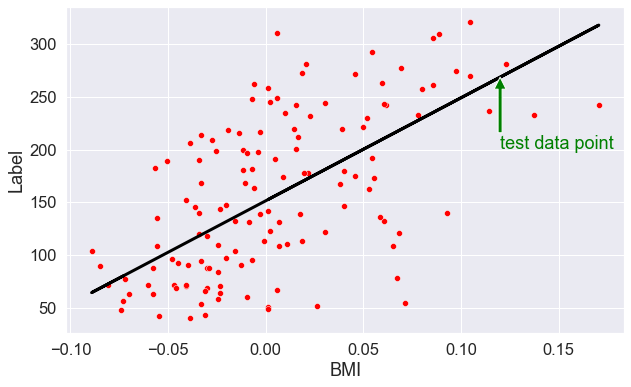

In [497]:
# plot the regression line against the test data
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=test, color="red")
plt.plot(test[["BMI"]], model.predict(test[["BMI"]]), color="black", linewidth=3)
plt.annotate('test data point', xy=(0.12, m*0.12+b), xytext=(0.12, m*0.05+ b), color='green', arrowprops=dict(facecolor='green'))

Text(0.1, [[161.31200646]], 'test data point')

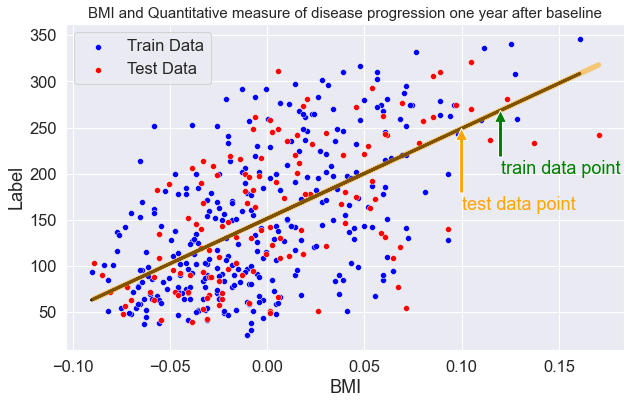

In [498]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train, color="blue",label='Train Data')
sns.scatterplot(x="BMI", y="Label", data=test, color="red", label='Test Data')
plt.title("BMI and Quantitative measure of disease progression one year after baseline", fontsize=15)
plt.legend()


plt.plot(train[["BMI"]], model.predict(train[["BMI"]]), color="black", linewidth=3)
plt.annotate('train data point', xy=(0.12, m*0.12+b), xytext=(0.12, m*0.05+ b), color='green', arrowprops=dict(facecolor='green'))

plt.plot(test[["BMI"]], model.predict(test[["BMI"]]), color="orange", linewidth=5,alpha=0.5)
plt.annotate('test data point', xy=(0.1, m*0.1+b), xytext=(0.1, m*0.01+b), color='orange', arrowprops=dict(facecolor='orange'))


## 6. Fine Tune

## 6.1 Dataset ratio change

### 1. Train:Test = 80:20
### 2. Train:Test = 50:50

Train Data : Test Data  = 80 : 20

In [499]:
train_size = int(len(diabetes_train_data) * 0.8)
train_80 = diabetes_train_data[:train_size]
test_20 = diabetes_train_data[train_size:]

In [500]:
print("Dataset Train(80%):Test(20%)")
m,b, predict_y, mse, mae = modelRun(model,train_80[['BMI']],train_80[["Label"]], test_20[['BMI']],test_20[["Label"]])

print(f'Slope,Intercept: {m},{b}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


Dataset Train(80%):Test(20%)
Slope,Intercept: [[957.76202681]],[152.05351614]
MSE: 4079.8238363494497
MAE: 53.7926335955505


Text(0.1, [[161.63113641]], 'test data point')

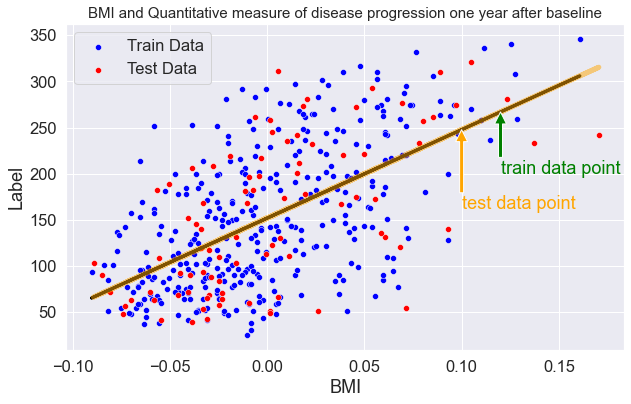

In [431]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train_80, color="blue",label='Train Data')
sns.scatterplot(x="BMI", y="Label", data=test_20, color="red", label='Test Data')
plt.title("BMI and Quantitative measure of disease progression one year after baseline", fontsize=15)
plt.legend()


plt.plot(train_80[["BMI"]], model.predict(train_80[["BMI"]]), color="black", linewidth=3)
plt.annotate('train data point', xy=(0.12, m*0.12+b), xytext=(0.12, m*0.05+ b), color='green', arrowprops=dict(facecolor='green'))

plt.plot(test_20[["BMI"]], model.predict(test_20[["BMI"]]), color="orange", linewidth=5,alpha=0.5)
plt.annotate('test data point', xy=(0.1, m*0.1+b), xytext=(0.1, m*0.01+b), color='orange', arrowprops=dict(facecolor='orange'))



Train Data : Test Data  = 50 : 50

In [506]:
train_size = int(len(diabetes_train_data) * 0.5)
train = diabetes_train_data[:train_size]
test = diabetes_train_data[train_size:]

In [507]:
print("Dataset Train(50%):Test(50%)")
m,b, predict_y, mse, mae =modelRun(model,train_50[['BMI']],train_50[["Label"]], test_50[['BMI']],test_50[["Label"]])

print(f'Slope,Intercept: {m},{b}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

Dataset Train(50%):Test(50%)
Slope,Intercept: [[914.45403841]],[150.05076286]
MSE: 3878.729958668522
MAE: 51.98892232611897


Text(0.1, [[159.19530324]], 'test data point')

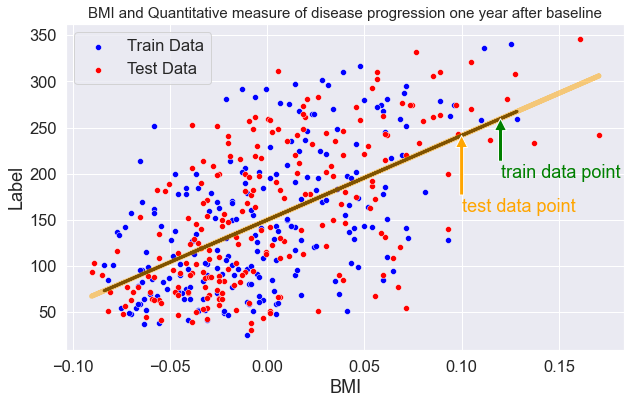

In [477]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="BMI", y="Label", data=train_50, color="blue",label='Train Data')
sns.scatterplot(x="BMI", y="Label", data=test_50, color="red", label='Test Data')
plt.title("BMI and Quantitative measure of disease progression one year after baseline", fontsize=15)
plt.legend()


plt.plot(train_50[["BMI"]], model.predict(train_50[["BMI"]]), color="black", linewidth=3)
plt.annotate('train data point', xy=(0.12, m*0.12+b), xytext=(0.12, m*0.05+ b), color='green', arrowprops=dict(facecolor='green'))

plt.plot(test_50[["BMI"]], model.predict(test_50[["BMI"]]), color="orange", linewidth=5,alpha=0.5)
plt.annotate('test data point', xy=(0.1, m*0.1+b), xytext=(0.1, m*0.01+b), color='orange', arrowprops=dict(facecolor='orange'))


## 6.2 Feature increase

### 1. BMI, BP

In [510]:
train_size = int(len(diabetes_train_data) * 0.7)
train = diabetes_train_data[:train_size]
test = diabetes_train_data[train_size:]

In [518]:
train_X = pd.concat([train['BMI'], train['BP']], axis=1) # total data with label
train_y = train[['Label']]
test_X =  pd.concat([test['BMI'], test['BP']], axis=1)
test_y = test[['Label']]

In [520]:
print("Dataset Train(70%):Test(30%)")
m,b, predict_y, mse, mae =modelRun(model,train_X, train_y, test_X, test_y)

print(f'Slope,Intercept: {m},{b}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

Dataset Train(70%):Test(30%)
Slope,Intercept: [[826.89965305 369.14787652]],[151.56538602]
MSE: 3235.9881097317384
MAE: 46.00051308645678


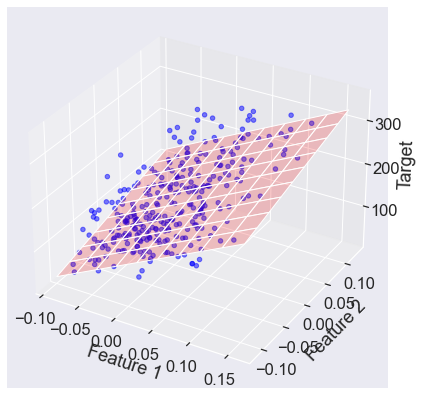

In [563]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a coordinate grid
x1 = np.linspace(train_X.to_numpy()[:,0].min(), train_X.to_numpy()[:,0].max(), num=10)
x2 = np.linspace(train_X.to_numpy()[:,1].min(), train_X.to_numpy()[:,1].max(), num=10)
x1, x2 = np.meshgrid(x1, x2)

# Compute corresponding y values
y_pred = model.intercept_ + model.coef_[0][0] * x1 + model.coef_[0][1] * x2

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_X.to_numpy()[:, 0], train_X.to_numpy()[:, 1], train_y.to_numpy(), c='blue', marker='o', alpha=0.5)
ax.plot_surface(x1, x2, y_pred, color='red', alpha=0.2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [562]:
import plotly.express as px
import plotly.graph_objects as go

x1 = np.linspace(train_X.to_numpy()[:,0].min(), train_X.to_numpy()[:,0].max(), num=10)
x2 = np.linspace(train_X.to_numpy()[:,1].min(), train_X.to_numpy()[:,1].max(), num=10)
x1, x2 = np.meshgrid(x1, x2)
y_pred = model.intercept_ + model.coef_[0][0] * x1 + model.coef_[0][1] * x2

fig = px.scatter_3d(
    x=train_X.to_numpy()[:,0],
    y=train_X.to_numpy()[:,1],
    z=train_y.to_numpy()[:,0],
    labels={'x': 'BMI', 'y': 'BP', 'z': 'Label'},
    size_max = 10
)


# Create a surface plot
surface = go.Surface(x=x1, y=x2, z=y_pred, colorscale='Reds', opacity=0.2, showscale=False)

fig.add_trace(surface)

fig.show()

## 7. Present my Solution

### Dataset
* Source: Diabetes dataset from NC State University in USA
* 10 columns: Age, Sex, BMI, BP, S1, S2, S3, S4, S5, S6 ($ -2.0<x<2.0$)
* Label: Quantitative value disease progression one year after baseline ($ 25<y<346$)


### Model
* ML library: Scikit-Learn 1.2.2
* Model: Univariate LinearRegression 
* Column for Train and Test : BMI (univariate model)

### Big Picture
* Univariage Linear Regression Model predicts  diebates progression one year for male and female patients well.

### What to do
* Univariate Linear Regression Model fine tuning by dataset ratio
* Feature addition

### Business issue
* Univariate model is a simple model, and it means low computation cost.
* If AI model predicts well despite of a few number of feature, then it can connect to lower data storage and save money.

### Interesting Point
* The results are slightly changed by different dataset ratio.
* Interestingly, 80:20(Train:Test) shows the worst result despite of largest training data.
* One feature addition helps to reduce the errors.

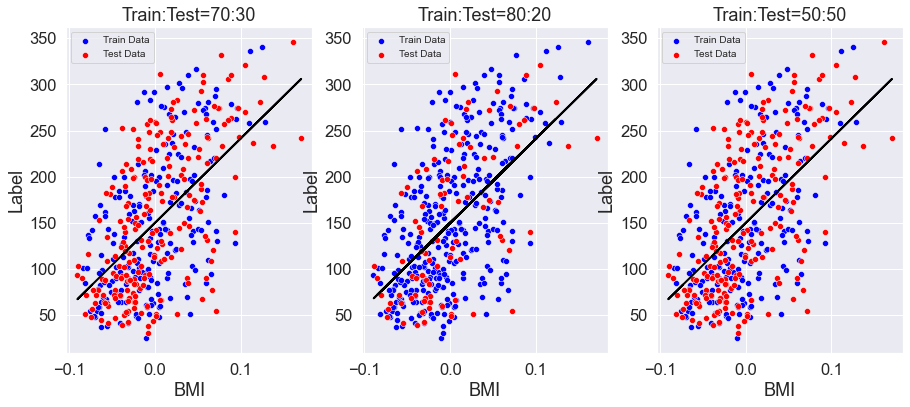

In [444]:
sns.set(font_scale=1.5)
fig,axes = plt.subplots(1,3, sharex=True,figsize=(15,6))


sns.scatterplot(x="BMI", y="Label", data=train, color="blue",label='Train Data',ax=axes[0])
sns.scatterplot(x="BMI", y="Label", data=test, color="red", label='Test Data',ax=axes[0])
axes[0].plot(test[["BMI"]], model.predict(test[["BMI"]]), color="black", linewidth=2)
axes[0].set_title('Train:Test=70:30')
axes[0].legend(fontsize=10)

sns.scatterplot(x="BMI", y="Label", data=train_80, color="blue",label='Train Data',ax=axes[1])
sns.scatterplot(x="BMI", y="Label", data=test_20, color="red", label='Test Data',ax=axes[1])
axes[1].plot(test_20[["BMI"]], model.predict(test_20[["BMI"]]), color="black", linewidth=2)
axes[1].set_title('Train:Test=80:20')
axes[1].legend(fontsize=10)


sns.scatterplot(x="BMI", y="Label", data=train_50, color="blue",label='Train Data',ax=axes[2])
sns.scatterplot(x="BMI", y="Label", data=test_50, color="red", label='Test Data',ax=axes[2])
axes[2].plot(test_50[["BMI"]], model.predict(test_50[["BMI"]]), color="black", linewidth=2)
axes[2].set_title('Train:Test=50:50')
axes[2].legend(fontsize=10)


### Fine Tune 1. Dataset Ratio between Train and Test Change Result

| Train  | Test | Scope | Intercept | MSE | MAE |
|--------|------|-------|-----------|-----|-----|
| 70% | 30% | 976 | 151 | 3,673| 50 |
| 80% | 20% | 957 | 152 | 4,079 | 53 |
| 50% | 50% | 914 | 150 | 3,878 | 51 |

* Table shows when Train data:Test data is 70:30, errors (MSE and MAE) are the lowest.
* Unexpectedly, 80:20 has the highest errors despite of largest amount of training data.
* Scope and intercept show slight differences among datasets.

### Fine Tune 2. Feature "BP" Addition Result

| | Train  | Test | Scope | Intercept | MSE | MAE |
|--|--------|------|-------|-----------|-----|-----|
| BMI only | 70% | 30% | 976 | 151 | 3,673| 50 |
| BMIand BP| 70% | 30% | 826 | 151 | 3,235| 46 |

* Table shows when the feature "BP"(Blood Pressure) is added, errors go down.

In conclusion,
* Univariate linear regression model predicts the diebate progression roughly.
* 'BMO' and 'diebate progression' has proportional relationship.
* If data splits to 70:30 (train:test), the prediction error rate goes down.
* If feature 'BP' is added, the prediction error is lower than before.

<p style='color:green;>
In conclusion, univariate linear regression model predicts diabetes progression roughly. BMI and diabete progression has proportional relationship. When the dataset ratio between training and testing is 70 and 30 has the lowest error rate. Additionally, if 'BP' feature is added, the error rate is lower than before. </p>

### End of Lab 3